# **Hyperparameter Tuning in Python**

## Chapter 1 - Hyperparameters and Parameters
> In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices. This is the Summary of lecture "Hyperparameter Tuning in Python", via datacamp.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Introduction
- Parameters
    - Components of the model learned during the modeling process
    - Do not set these manually


### Extracting a Logistic Regression parameter
You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the [scikit-learn.org](https://scikit-learn.org/) documentation for the `LogisticRegression()` module under 'Attributes'.

This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

In this exercise we will extract the coefficient parameter (found in the `coef_` attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.

In [35]:
credit_card = pd.read_csv('credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
credit_card.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,True,False,True,False,False,False,False,True,False,False
1,2,120000,26,-1,2,0,0,0,2,2682,...,True,False,True,False,False,False,False,False,True,False
2,3,90000,34,0,0,0,0,0,0,29239,...,True,False,True,False,False,False,False,False,True,False
3,4,50000,37,0,0,0,0,0,0,46990,...,True,False,True,False,False,False,False,True,False,False
4,5,50000,57,-1,0,-1,0,0,0,8617,...,False,False,True,False,False,False,False,True,False,False


In [36]:
from sklearn.model_selection import train_test_split

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(max_iter=1000)
log_reg_clf.fit(X_train, y_train)

# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({'Variable': original_variables,
                               'Coefficient': model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
print(top_three_df)

       Variable   Coefficient
0     LIMIT_BAL -6.977738e-07
1           AGE -2.127848e-02
2         PAY_0  1.876894e-01
3         PAY_2  1.447560e-01
4         PAY_3  1.236060e-01
5         PAY_4  1.122687e-01
6         PAY_5  1.031810e-01
7         PAY_6  9.289733e-02
8     BILL_AMT1 -5.627443e-06
9     BILL_AMT2  3.634145e-06
10    BILL_AMT3  1.024709e-06
11    BILL_AMT4 -4.802755e-07
12    BILL_AMT5  1.350610e-06
13    BILL_AMT6 -1.471955e-06
14     PAY_AMT1 -1.708411e-05
15     PAY_AMT2 -2.069216e-05
16     PAY_AMT3 -3.045951e-06
17     PAY_AMT4 -4.689321e-06
18     PAY_AMT5 -2.608703e-06
19     PAY_AMT6 -3.205912e-06
20        SEX_2 -2.366238e-02
21  EDUCATION_1 -8.339619e-03
22  EDUCATION_2 -6.633597e-03
23  EDUCATION_3 -5.410737e-04
24  EDUCATION_4 -1.058441e-03
25  EDUCATION_5 -2.372281e-03
26  EDUCATION_6 -4.097835e-05
27   MARRIAGE_1  1.690885e-02
28   MARRIAGE_2 -3.576897e-02
29   MARRIAGE_3  1.667287e-04
  Variable  Coefficient
2    PAY_0     0.187689
3    PAY_2     0.14475

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Extracting a Random Forest parameter
You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peak under the hood at what the model is doing.

In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import os
import pydot

rf_clf = RandomForestClassifier(max_depth=4, criterion='gini', n_estimators=10);
rf_clf.fit(X_train, y_train)

# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Convert tree to dot object
export_graphviz(chosen_tree,
                out_file='tree6.dot',
                feature_names=X_train.columns,
                filled=True,
                rounded=True)
(graph, ) = pydot.graph_from_dot_file('tree6.dot')

# Convert dot to png
graph.write_png('tree_viz_image.png')

# Visualize the graph using the provided image
tree_viz_image = plt.imread('tree_viz_image.png')
plt.figure(figsize = (16,10))
plt.imshow(tree_viz_image, aspect='auto');
plt.axis('off')

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print('This node split on feature {}, at a value of {}'.format(split_column_name, split_value))

### Introducing Hyperparameters
- Hyperparameters
    - Something you set before the modelling process (need to tune)
    - The algorithm does not learn these

### Exploring Random Forest Hyperparameters
Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model.

You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

rf_clf_old = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2,
                                    n_estimators=5, oob_score=False, random_state=42)

rf_clf_old.fit(X_train, y_train)
rf_old_predictions = rf_clf_old.predict(X_test)

# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print('Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}'.format(
    confusion_matrix(y_test, rf_old_predictions),
    accuracy_score(y_test, rf_old_predictions)
))

RandomForestClassifier(n_estimators=5, random_state=42)
Confusion Matrix: 

 [[6336  667]
 [1249  748]] 
 Accuracy Score: 

 0.7871111111111111


In [ ]:
# Create a new random forest classifier with better hyperparameters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print('Confusion Matrix: \n\n', confusion_matrix(y_test, rf_new_predictions))
print('Accuracy Score: \n\n', accuracy_score(y_test, rf_new_predictions))

Confusion Matrix: 

 [[6638  365]
 [1235  762]]
Accuracy Score: 

 0.8222222222222222


### Hyperparameters of KNN
To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.



answer form Datacamp

In [ ]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.7564444444444445, 0.7786666666666666, 0.7812222222222223


### Setting & Analyzing Hyperparameter Values


### Automating Hyperparameter Choice
Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)

    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001  0.778111
1          0.010  0.823000
2          0.050  0.826000
3          0.100  0.825556
4          0.200  0.823333
5          0.500  0.818778


### Building Learning Curves
If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is `np.linspace(start, end, num)` which allows you to create a number of values (`num`) evenly spread within an interval (`start`, `end`) that you specify.

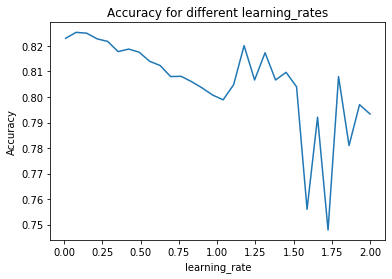

In [ ]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
    # Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results
plt.plot(learn_rates, accuracies);
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates');

You can see that for low values, you get a pretty good accuracy. However once the learning rate pushes much above 1.5, the accuracy starts to drop.

## Chapter 2 - Grid search
> This chapter introduces you to a popular automated hyperparameter tuning methodology called Grid Search. You will learn what it is, how it works and practice undertaking a Grid Search using Scikit Learn. You will then learn how to analyze the output of a Grid Search & gain practical experience doing this. This is the Summary of lecture "Hyperparameter Tuning in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: 

In [39]:
import pandas as pd
import numpy as np
from pprint import pprint

### Introducing Grid Search

### Build Grid Search functions
In data science it is a great idea to try building algorithms, models and processes 'from scratch' so you can really understand what is happening at a deeper level. Of course there are great packages and libraries for this work (and we will get to that very soon!) but building from scratch will give you a great edge in your data science work.

In this exercise, you will create a function to take in 2 hyperparameters, build models and return results. You will use this function in a future exercise.

In [41]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

answer from datacamp

In [43]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

### Iteratively tune multiple hyperparameters
In this exercise, you will build on the function you previously created to take in 2 hyperparameters, build a model and return the results. You will now use that to loop through some values and then extend this function and loop with another hyperparameter.

In [45]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate, max_depth))
        
# Print the results
print(results_list)

[[0.01, 2, 0.8202222222222222], [0.01, 4, 0.8185555555555556], [0.01, 6, 0.8135555555555556], [0.1, 2, 0.82], [0.1, 4, 0.8194444444444444], [0.1, 6, 0.8168888888888889], [0.5, 2, 0.8155555555555556], [0.5, 4, 0.8001111111111111], [0.5, 6, 0.7881111111111111]]


In [ ]:
# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):
    # Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth,
                                       subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])

In [ ]:
# Create the new list to test
subsample_list = [0.4, 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        # Extend the for loop
        for subsample in subsample_list:
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print the results
pprint(results_list)

[[0.01, 2, 0.8214444444444444],
 [0.01, 4, 0.8198888888888889],
 [0.01, 6, 0.8172222222222222],
 [0.1, 2, 0.8205555555555556],
 [0.1, 4, 0.8204444444444444],
 [0.1, 6, 0.8204444444444444],
 [0.5, 2, 0.8188888888888889],
 [0.5, 4, 0.8042222222222222],
 [0.5, 6, 0.7894444444444444],
 [0.01, 2, 0.4, 0.8192222222222222],
 [0.01, 2, 0.6, 0.8208888888888889],
 [0.01, 4, 0.4, 0.8183333333333334],
 [0.01, 4, 0.6, 0.8195555555555556],
 [0.01, 6, 0.4, 0.8177777777777778],
 [0.01, 6, 0.6, 0.8196666666666667],
 [0.1, 2, 0.4, 0.821],
 [0.1, 2, 0.6, 0.8201111111111111],
 [0.1, 4, 0.4, 0.8207777777777778],
 [0.1, 4, 0.6, 0.8196666666666667],
 [0.1, 6, 0.4, 0.8155555555555556],
 [0.1, 6, 0.6, 0.8183333333333334],
 [0.5, 2, 0.4, 0.8128888888888889],
 [0.5, 2, 0.6, 0.8156666666666667],
 [0.5, 4, 0.4, 0.7945555555555556],
 [0.5, 4, 0.6, 0.8065555555555556],
 [0.5, 6, 0.4, 0.7714444444444445],
 [0.5, 6, 0.6, 0.7743333333333333]]


### Grid Search with Scikit Learn
- Steps in a Grid Search
    1. An algorithm to tune the hyperparameters (or estimator)
    2. Defining which hyperparameters to tune
    3. Defining a range of values for each hyperparameter
    4. Setting a cross-validatoin scheme
    5. Defining a score function so we can decide which square on our grid was 'the best'
    6. Include extra useful information or functions

### GridSearchCV with Scikit Learn
The `GridSearchCV` module from Scikit Learn provides many useful features to assist with efficiently undertaking a grid search. You will now put your learning into practice by creating a `GridSearchCV` object with certain parameters.

The desired options are:

- A Random Forest Estimator, with the split criterion as 'entropy'
- 5-fold cross validation
- The hyperparameters `max_depth` (2, 4, 8, 15) and `max_features` ('auto' vs 'sqrt')
- Use `roc_auc` to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parametergrid
param_grid = {
    'max_depth':[2, 4, 8, 15],
    'max_features':['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True,
    return_train_score=True
)

print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')


### Understanding a grid search output


### Exploring the grid search results
You will now explore the `cv_results_` property of the GridSearchCV object defined in the video. This is a dictionary that we can read into a pandas DataFrame and contains a lot of useful information about the grid search we just undertook.

A reminder of the different column types in this property:

- `time_` columns
- `param_` columns (one for each hyperparameter) and the singular params column (with all hyperparameter settings)
- a `train_score` column for each cv fold including the mean_train_score and std_train_score columns
- a `test_score` column for each cv fold including the mean_test_score and std_test_score columns
- a `rank_test_score` column with a number from 1 to n (number of iterations) ranking the rows based on their `mean_test_score`

In [48]:
grid_rf_class.fit(X_train, y_train)

# Read the cv_results property into adataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/c

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008394      0.005662         0.000000        0.000000   
1       2.391917      0.126908         0.047261        0.007851   
2       0.004333      0.003165         0.000000        0.000000   
3       4.035311      0.146921         0.049742        0.004109   
4       0.004642      0.002176         0.000000        0.000000   
5       7.205680      0.164465         0.069315        0.003866   
6       0.009042      0.003439         0.000000        0.000000   
7      10.174682      2.017540         0.094152        0.036486   

  param_max_depth param_max_features  \
0               2               auto   
1               2               sqrt   
2               4               auto   
3               4               sqrt   
4               8               auto   
5               8               sqrt   
6              15               auto   
7              15               sqrt   

                                   

### Analyzing the best results
At the end of the day, we primarily care about the best performing 'square' in a grid search. Luckily Scikit Learn's `gridSearchCV` objects have a number of parameters that provide key information on just the best square (or row in `cv_results_`).

Three properties you will explore are:

- `best_score_` – The score (here ROC_AUC) from the best-performing square.
- `best_index_` – The index of the row in `cv_results_` containing information on the best-performing square.
- `best_params_` – A dictionary of the parameters that gave the best score, for example 'max_depth': 10

In [50]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the max_depth parameter from the best-performing square and print
best_max_depth = grid_rf_class.best_params_['max_depth']
print(best_max_depth)

0.7795991402464372
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5        7.20568      0.164465         0.069315        0.003866   

  param_max_depth param_max_features  \
5               8               sqrt   

                                     params  split0_test_score  \
5  {'max_depth': 8, 'max_features': 'sqrt'}           0.782066   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
5           0.782138           0.762919  ...         0.779599        0.008779   

   rank_test_score  split0_train_score  split1_train_score  \
5                1            0.829966            0.831148   

   split2_train_score  split3_train_score  split4_train_score  \
5            0.830005            0.828884            0.829034   

   mean_train_score  std_train_score  
5          0.829808         0.000814  

[1 rows x 22 columns]
8


### Using the best results
While it is interesting to analyze the results of our grid search, our final goal is practical in nature; we want to make predictions on our test set using our estimator object.

We can access this object through the `best_estimator_` property of our grid search object.

In this exercise we will take a look inside the `best_estimator_` property and then use this to make predictions on our test set for credit card defaults and generate a variety of scores. Remember to use `predict_proba` rather than `predict` since we need probability values rather than class labels for our roc_auc score. We use a slice `[:,1]` to get probabilities of the positive class.

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# See what type of object the best_estimator_property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:, 1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[1 0 0 1 0]
Confusion Matrix 
 [[6685  323]
 [1292  700]]
ROC-AUC Score 
 0.7767071783137115


The `.best_estimator_` property is a really powerful property to understand for streamlining your machine learning model building process. You now can run a grid search and seamlessly use the best model from that search to make predictions.